In [197]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [198]:
test=pd.read_csv('test.csv')
train=pd.read_csv('train.csv')

In [199]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [200]:
train.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [201]:
train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [202]:
data=pd.concat([train,test],ignore_index=True)

In [203]:
data.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


In [204]:
# Drop unique ID and mostly null columns
drop_cols = ['Id', 'PoolQC', 'MiscFeature', 'Alley', 'Fence']
data.drop(columns=drop_cols, inplace=True)


In [205]:
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500.0
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500.0
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500.0
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000.0
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000.0


# Checking Missing Values

## Visualize missing values

In [206]:
missing_values=data.isnull().sum().sort_values(ascending=False)
missing_values = missing_values[missing_values > 0]
print("Missing_values:", missing_values.head(20))

Missing_values: MasVnrType      1766
SalePrice       1459
FireplaceQu     1420
LotFrontage      486
GarageCond       159
GarageYrBlt      159
GarageFinish     159
GarageQual       159
GarageType       157
BsmtExposure      82
BsmtCond          82
BsmtQual          81
BsmtFinType2      80
BsmtFinType1      79
MasVnrArea        23
MSZoning           4
BsmtHalfBath       2
BsmtFullBath       2
Utilities          2
Functional         2
dtype: int64


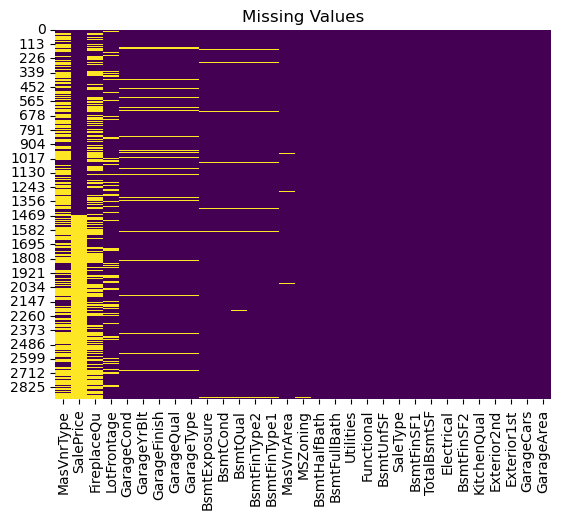

In [207]:
sns.heatmap(data[missing_values.index].isnull(),cbar=False,cmap='viridis')
plt.title("Missing Values")
plt.show()

# Filling all missing Values

 ## Categorical fill with mode

In [208]:
cat_cols=data.select_dtypes(include='object').columns
for col in cat_cols:
    data[col]=data[col].fillna(data[col].mode()[0])

## Numerical fill with median

In [209]:
col_num=data.select_dtypes(include=['int64', 'float64']).columns
for col in col_num:
    data[col]=data[col].fillna(data[col].median())

In [210]:
test['LotFrontage'].fillna(test['LotFrontage'].median(), inplace=True)
test['MSZoning'].fillna(0, inplace=True)
test['SaleType'].fillna(0, inplace=True)
test.isnull().sum()



C:\Users\Pritam\AppData\Local\Temp\ipykernel_17664\2448408383.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test['LotFrontage'].fillna(test['LotFrontage'].median(), inplace=True)
C:\Users\Pritam\AppData\Local\Temp\ipykernel_17664\2448408383.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always beh

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MiscVal          0
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
Length: 80, dtype: int64

# EDA on train data


In [211]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [212]:
print("Skew:", train['SalePrice'].skew())
print("Kurtosis:", train['SalePrice'].kurt())

Skew: 1.8828757597682129
Kurtosis: 6.536281860064529


Skewness and kurtosis reveal the shape of the `SalePrice` distribution. A right skew suggests many cheaper houses, and high kurtosis means more extreme values.


# Distribution of SalePrice

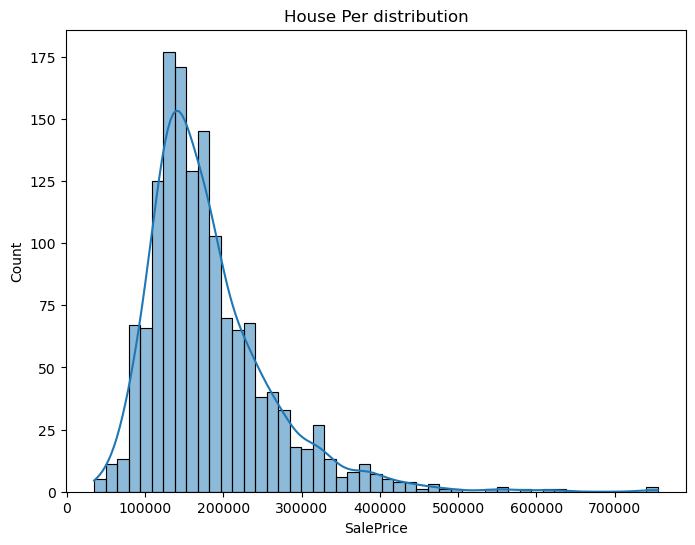

In [213]:
plt.figure(figsize=(8,6))
sns.histplot(train['SalePrice'],kde=True,)
plt.title("House Per distribution")
plt.savefig("saleprice_distribution.png")
plt.show()

`SalePrice` is right-skewed — applying a log transformation later can help with regression modeling.


# Correlation with SalePrice

In [214]:
corr = train.select_dtypes(include='number').corr()
top_corr=corr['SalePrice'].sort_values(ascending=False)[1:11]

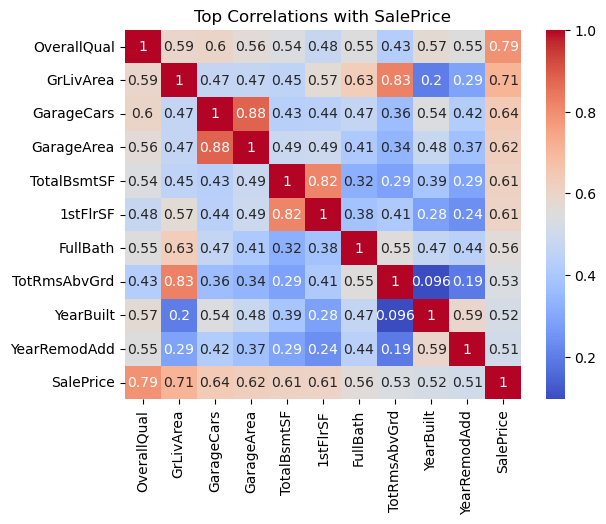

In [215]:
sns.heatmap(train[top_corr.index.tolist() + ['SalePrice']].corr(), annot=True, cmap='coolwarm')
plt.title("Top Correlations with SalePrice")
plt.savefig("top_features_heatmap.png")
plt.show()


These features show the strongest correlation with `SalePrice` and are good candidates for model input.


# Scatterplot: GrLivArea vs SalePrice

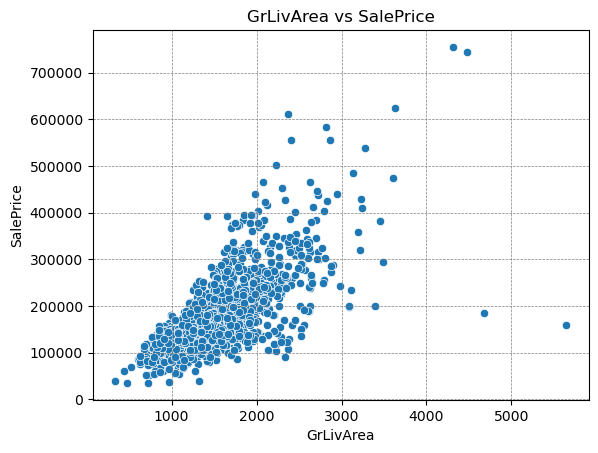

In [216]:
sns.scatterplot(x='GrLivArea',y='SalePrice',data=train)
plt.grid(True, linestyle='--', linewidth=0.5, color='gray')
plt.title("GrLivArea vs SalePrice")
plt.savefig("grlivarea_vs_price.png")
plt.show()

# Boxplot: OverallQual vs SalePrice

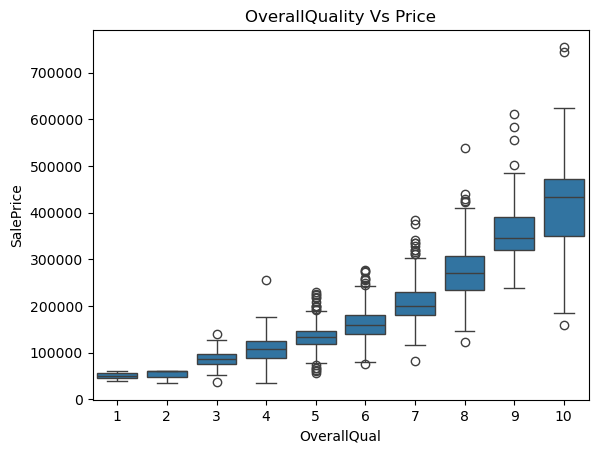

In [217]:
sns.boxplot(x='OverallQual', y='SalePrice',data=train)
plt.title("OverallQuality Vs Price")
plt.savefig("overallqual_vs_price.png")
plt.show()

As `OverallQual` increases, house prices rise — it's one of the most important predictors.


# Boxplot: Neighborhood vs SalePrice

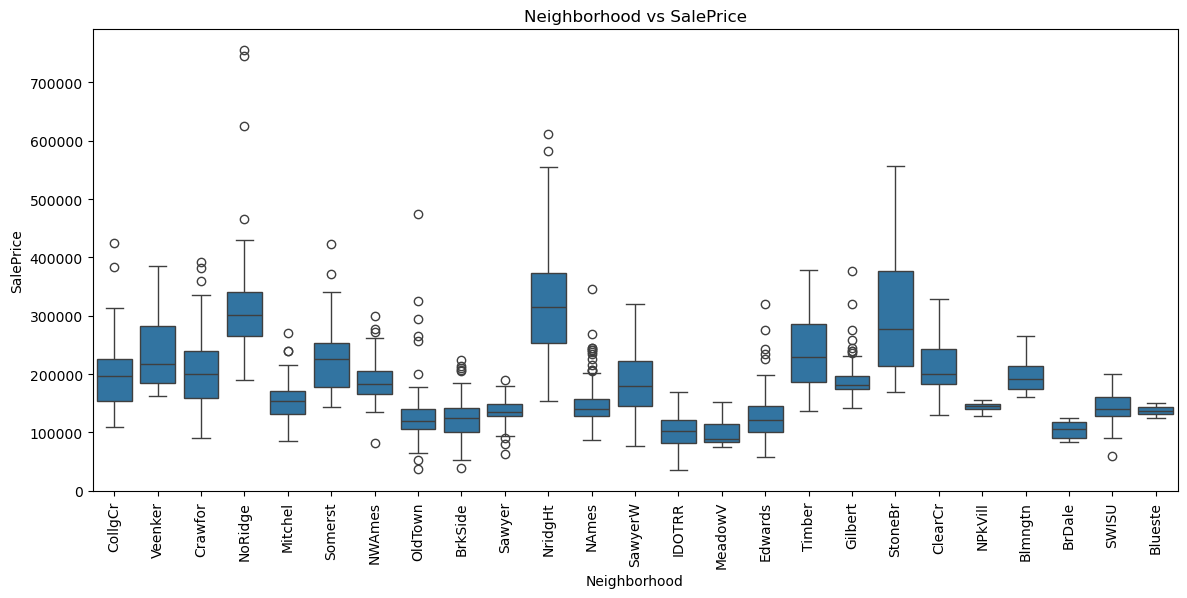

In [218]:
plt.figure(figsize=(14,6))
plt.xticks(rotation=90)
sns.boxplot(x='Neighborhood',y='SalePrice',data=train)
plt.title("Neighborhood vs SalePrice")
plt.show()

# Feature Engineering Example

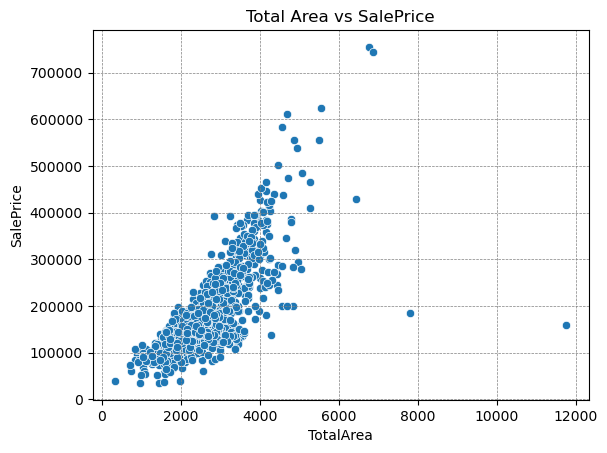

In [219]:
train['TotalArea'] = train['GrLivArea'] + train['TotalBsmtSF']
sns.scatterplot(x='TotalArea', y='SalePrice', data=train)
plt.grid(True, linestyle='--', linewidth=0.5, color='gray')
plt.title("Total Area vs SalePrice")
plt.show()

In [220]:
train.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
TotalArea          0
Length: 82, dtype: int64

In [221]:
test.isnull().sum()


Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MiscVal          0
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
Length: 80, dtype: int64